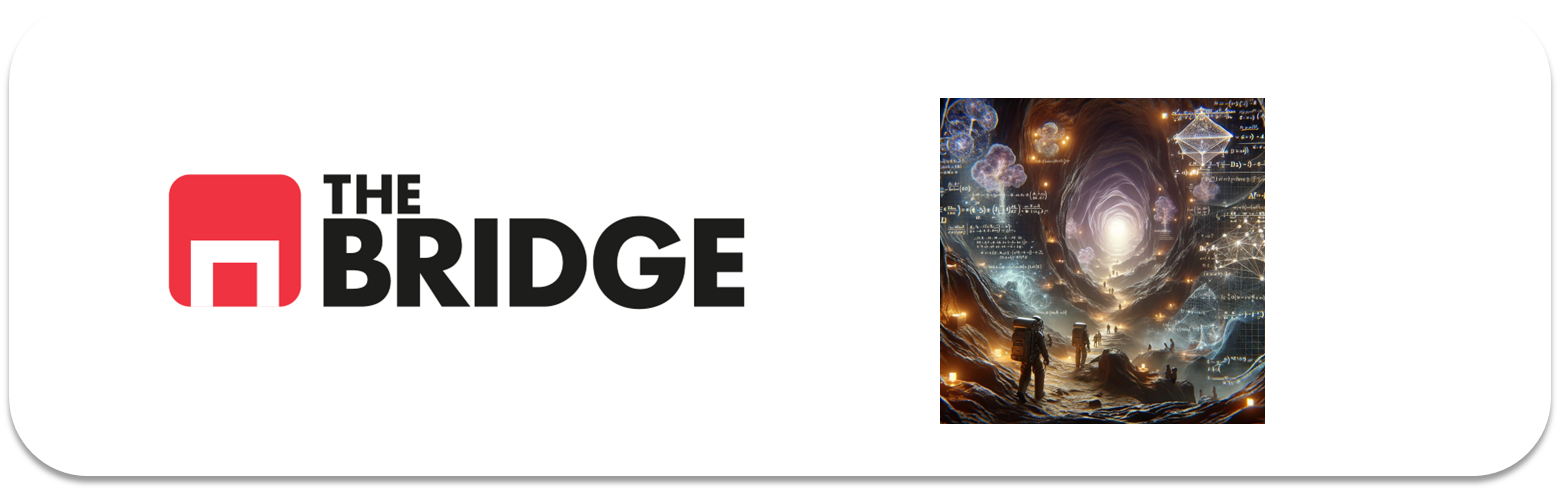

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset de ropa empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### VIDEOS PRE-SESION (A modo de pequeño wrapup "conceptual")

Parte I: https://www.youtube.com/watch?v=MRIv2IwFTPg  
Parte II: https://www.youtube.com/watch?v=uwbHOpp9xkc

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import whole class and then access using fully qualified names
from keras._tf_keras import keras
from keras_tuner import RandomSearch, GridSearch

# Pylance not working
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

from utils import datascience as ds
from utils import functions as fun
from utils import vizdatatools as viz

## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

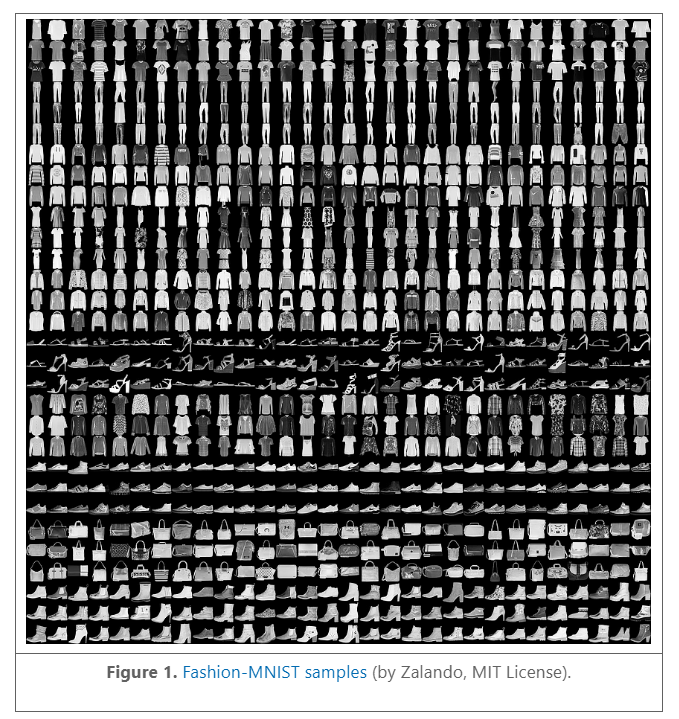

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada. 

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde. 

Ejemplo del grafico de predicción más nivel de confianza:

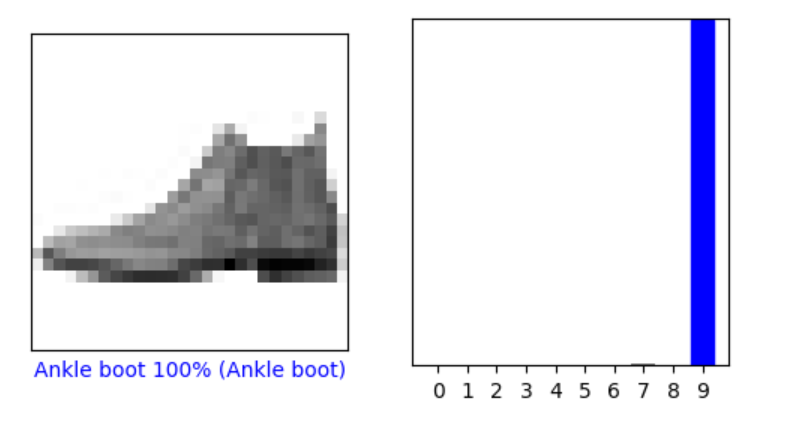

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado. 

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

```python

# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

```

### Cargar data set y split de train y test

In [2]:
# Dataset de datos de Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Mini-EDA y transformación del set

Inspeccionar la forma de los datos.

In [3]:
pd.DataFrame(y_train).nunique()

0    10
dtype: int64

In [4]:
pd.DataFrame(y_train).value_counts()

0
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

*Es un problema de clasificación en el que afortunadamente el set está perfectamente equilibrado.*

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
pd.DataFrame(X_train.flatten()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47040000 entries, 0 to 47039999
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   0       uint8
dtypes: uint8(1)
memory usage: 44.9 MB


*No parece que haya valores missing.*

In [7]:
X_train.max()

255

*El set toma valores entre 0 y 255, con lo que dividir entre 255 será suficiente para normalizar los datos.*

In [8]:
# Normalizar los sets
X_train = X_train / 255.0
X_test = X_test / 255.0 

9

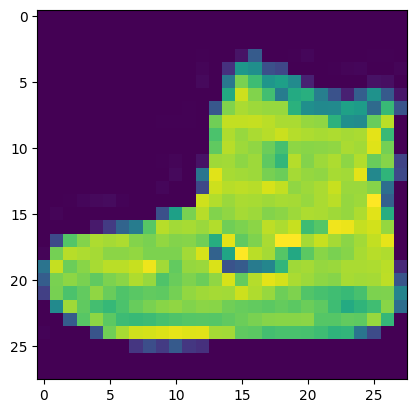

In [9]:
plt.imshow(X_train[0])

y_train[0]

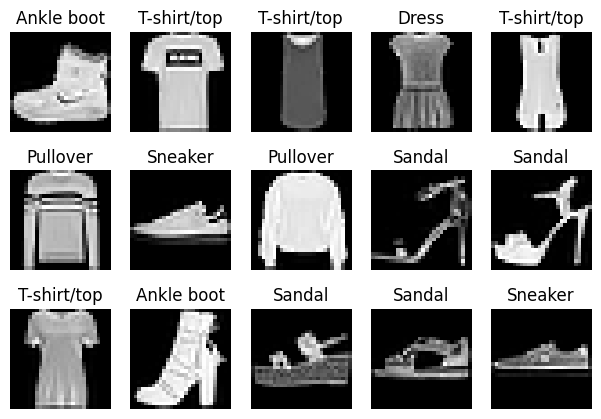

In [10]:
# Ver las primeras 15 instancias del conjunto de entrenamiento
fun.plot_fashion_items(X_train[:15], y_train[:15])


*No quiero transformar X e y en DataFrames porque la eficiencia de los modelos DL mejora si se usa directamente np.ndarray.*

*Tampoco voy a profundizar de ninguna forma en la evaluación de features, porque estas son los 28x28 pixeles (784), y aunque se podría analizar cuales son las menos importantes (probablemente las de los contornos de las imagenes) voy a utlizar un modelo de DL y no voy a invertir tiempo en esta tarea.*

### Modelo DL con Keras

#### Contrucción del modelo con Functional API

Voy a tener una capa de "Flatten" para aplanar las imagenes

Como tengo muchas features (28*28=784) voy a comenzar la estrategia usando menos neuronas (proyección tipo PCA: reducción)

In [11]:
# NO voy a usar esto porque son demasiados fearures iniciales
# 2 veces el número de features será el número de neuronas en cada capa oculta
# factor_expansion = 2
# num_units = X_train.shape[1] * X_train.shape[2] * factor_expansion
# print('Neuronas por capa:', num_units)

In [12]:
# Número de neuronas en la capa salida = número de labels en el target = 10
pd.DataFrame(y_train).nunique()[0]

10

In [13]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]),
                                 name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=300, 
                              activation='relu',
                              name='hidden_1')(flatten_layer)
hidden_2 = keras.layers.Dense(units=150, 
                              activation='relu',
                              name='hidden_2')(hidden_1)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], 
                            activation='softmax',
                            name='output')(hidden_2)
model = keras.Model(inputs=[input_layer], 
                    outputs=[output])

*Podemos ver los pesos de las capas sin entrenar, porque los inicializa "aleatoriamente" (no del todo). Los bias los inicializan a 0.*

In [14]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Flatten name=flatten_layer, built=True>,
 <Dense name=hidden_1, built=True>,
 <Dense name=hidden_2, built=True>,
 <Dense name=output, built=True>]

In [15]:
model.layers[0].get_weights()

[]

In [16]:
model.layers[1].get_weights()

[]

In [17]:
for i in range(2, 5):
    weights, biases = model.layers[i].get_weights()
    print('Capa:', i)
    print(weights.shape)
    print(biases.shape)
    print('')

Capa: 2
(784, 300)
(300,)

Capa: 3
(300, 150)
(150,)

Capa: 4
(150, 10)
(10,)



In [18]:
weights, biases = model.layers[2].get_weights()
print(weights[0])
print(biases)

[ 0.06098872 -0.04612516  0.05585115 -0.0068849  -0.01410312  0.05596638
 -0.05724417  0.04250075 -0.04116913 -0.01487695 -0.07295024  0.05505237
  0.0504591   0.01300277 -0.02049267 -0.04859191 -0.04770246 -0.02096318
  0.04811602  0.04288121 -0.0573885  -0.00498618  0.06090185 -0.04419173
  0.00067175 -0.01008443  0.0464263  -0.0662506  -0.00846379 -0.05561271
  0.06932549  0.04065963  0.0136      0.0154233   0.05194901  0.03916477
 -0.00597083  0.052237    0.06636123  0.05958493  0.02478939  0.00434435
 -0.00970365 -0.0721945  -0.00992727  0.0640202   0.05091779 -0.05174866
 -0.06959133 -0.03871615  0.0692794   0.0241207  -0.02884643 -0.03516157
  0.04494143 -0.06640603  0.04929522  0.04354607 -0.03924825 -0.06182944
  0.05124864  0.05189925  0.05011034 -0.00132729  0.01419734  0.04285502
 -0.02754041  0.02197935 -0.05924938  0.00974777  0.00496265 -0.00066414
  0.0351226  -0.06517646 -0.06511408 -0.00077919 -0.0534595   0.04494987
  0.01802824  0.05661532  0.00544309 -0.05995567 -0

*Inspeccionar el modelo usando el método `.summary` para imprimir una descripción simple del modelo.*

In [19]:
# La primera hidden layer tiene (28*28)+1(bias) entradas x 300 salidas --> 235500 parámetros
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

*Establecemos la configuración de ejecución: compile.*

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
# Número de datos*feaures
60_000 * 28 * 28

47040000

Optimizador --> Adam porque datos*features es alto

Función de perdida --> SparseCategoricalCrossentropy porque es un problema de clasificación múltiple en el que todas las labels están en una única columna.

Métricas --> SparseCategoricalAccuracy, porque el target está balanceado. "alculates how often predictions match integer labels"

In [22]:
# Método 1: Congiguración de ejecución
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['sparse_categorical_accuracy'])

In [23]:
# Congiguración de ejecución
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# keras.metrics.Precision(),
# keras.metrics.Recall()

Voy a hacer el entranamiento fijando un EarlyStopping. El motivo es que no quiero que siga entrenando épocas innecesariamente si no hay una mejora real en el set de validación.

No voy a fijar explicitamente un set de validación si no que le propio fit voy a indicar que utilice un 20% del train_set.

In [24]:
# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)


Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6561 - sparse_categorical_accuracy: 0.7700 - val_loss: 0.3855 - val_sparse_categorical_accuracy: 0.8624
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.8726
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3355 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8707
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3067 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.3450 - val_sparse_categorical_accuracy: 0.8794
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2846 - sparse_categorical_accuracy: 0.8933 - val_loss: 0.3825 - val_sparse_categorical_accuracy: 0.8643
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2721 - sparse_categorical_accuracy: 0.8971 - val_loss: 0.3448 - val_sparse_categorical_accuracy: 0.8770
Epoch 7/10

In [26]:
# Historico del entrenamiento
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

{'verbose': 'auto', 'epochs': 100, 'steps': 750}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
{'loss': [0.5004569888114929, 0.36385875940322876, 0.3266269862651825, 0.30249595642089844, 0.2860751450061798, 0.2705819606781006, 0.2568293809890747, 0.24286361038684845, 0.231414332985878, 0.225263774394989, 0.214040145277977, 0.20724426209926605, 0.1960090696811676, 0.19461283087730408, 0.18127380311489105, 0.1793503612279892, 0.16920731961727142, 0.16281859576702118, 0.1591341644525528, 0.15499401092529297, 0.14476877450942993], 'sparse_categorical_accuracy': [0.8211666941642761, 0.8666458129882812, 0.8788124918937683, 0.8877291679382324, 0.8929583430290222, 0.8981249928474426, 0.9035624861717224, 0.9082708358764648, 0.9117291569709778, 0.9145833253860474, 0.9198541641235352, 0.922249972820282, 0.9254583120346069, 0.9258124828338623, 0.9310625195503235, 0.9319375

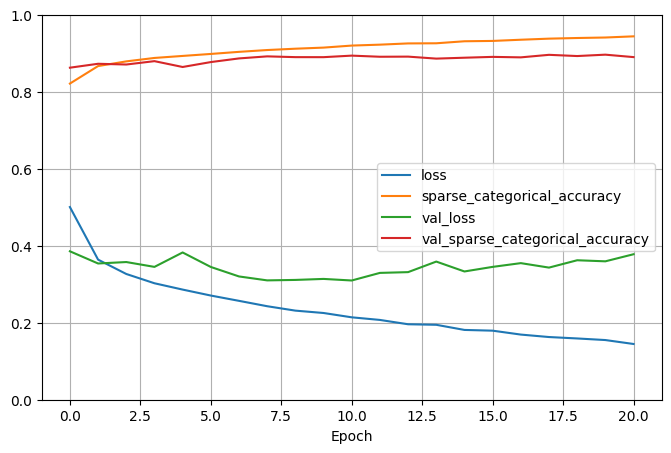

In [27]:
# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

`PROBLEMAS`: el modelo no parece estar convergiendo bien, porque train y validación se separan con el paso de las épocas. Es decir, estoy haciendo un overfitting del entrenamiento, y quiero que generalice mejor.

Para ello voy a tener que tocar un poco parámetros como optimizador, capas, neuronas, funciones de activación...

Voy a probar varias estrategias

### Estrategia de mejora 1: Agregar Dropout (al 50%)

Para evitar sobreajuste. En clase se ha comentado que esto podría mejorar los resultados pero aún no se ha visto como hacerlo, así que me he apoyado en ChatGPT y web Keras para ver como implementarlo.

Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8014 - sparse_categorical_accuracy: 0.7127 - val_loss: 0.4191 - val_sparse_categorical_accuracy: 0.8451
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4894 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.3850 - val_sparse_categorical_accuracy: 0.8573
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4351 - sparse_categorical_accuracy: 0.8400 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.8602
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4049 - sparse_categorical_accuracy: 0.8512 - val_loss: 0.3662 - val_sparse_categorical_accuracy: 0.8641
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3898 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3534 - val_sparse_categorical_accuracy: 0.8712
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3763 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.3502 - val_sparse_categorical_accuracy: 0.8698
Epoch 7/10

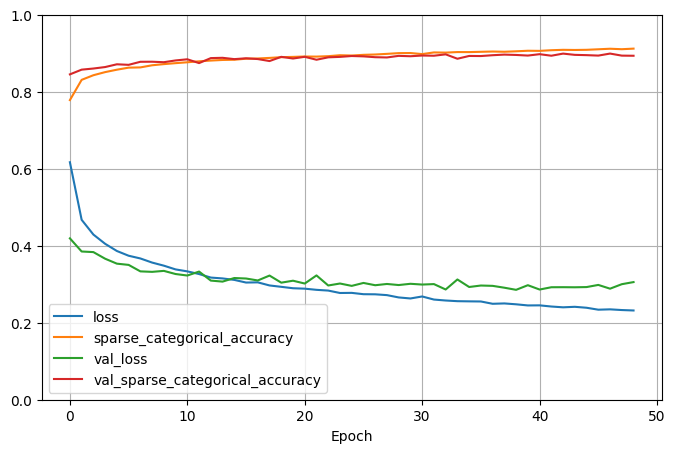

In [29]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=300, activation='relu', name='hidden_1')(flatten_layer)
dropout_1 = keras.layers.Dropout(rate=0.5, name='dropout_1')(hidden_1)
hidden_2 = keras.layers.Dense(units=150, activation='relu', name='hidden_2')(dropout_1)
dropout_2 = keras.layers.Dropout(rate=0.5, name='dropout_2')(hidden_2)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_2)
model_dropout = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_dropout.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                      loss=keras.losses.SparseCategoricalCrossentropy(),
                      metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_dropout.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Parece que haya mejorado bastante el accuracy, pero la función de pérdida sigue sin converger del todo. Quiero mejorarla.

### Estrategia de mejora 2: Agregar Regularización L2

Para evitar sobreajuste.

Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0839 - sparse_categorical_accuracy: 0.7712 - val_loss: 0.6745 - val_sparse_categorical_accuracy: 0.8382
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6153 - sparse_categorical_accuracy: 0.8486 - val_loss: 0.5793 - val_sparse_categorical_accuracy: 0.8422
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5260 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.5485 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4855 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.4810 - val_sparse_categorical_accuracy: 0.8598
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4519 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.4570 - val_sparse_categorical_accuracy: 0.8692
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4471 - sparse_categorical_accuracy: 0.8709 - val_loss: 0.4705 - val_sparse_categorical_accuracy: 0.8644
Epoch 7/10

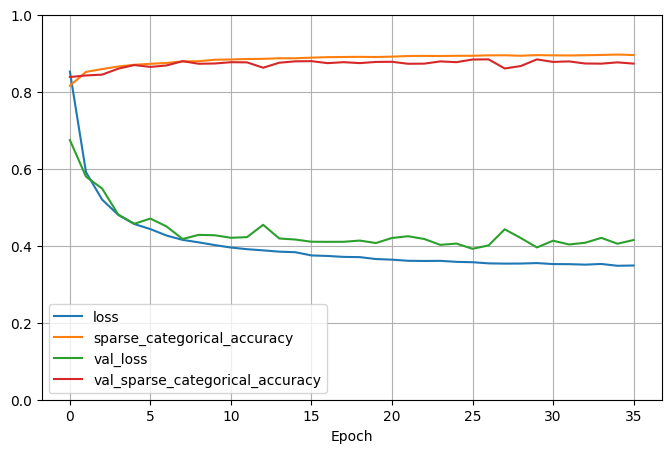

In [43]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=300, 
                              activation='relu', 
                              kernel_regularizer=keras.regularizers.l2(0.001), 
                              name='hidden_1')(flatten_layer)
hidden_2 = keras.layers.Dense(units=150, 
                              activation='relu', 
                              kernel_regularizer=keras.regularizers.l2(0.001), 
                              name='hidden_2')(hidden_1)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_2)
model_L2 = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_L2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss=keras.losses.SparseCategoricalCrossentropy(),
                 metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_L2 = model_L2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_L2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Ha necesitado más épocas para converger, pero el resultado es bastante similar al anterior. Esta vez tal vez ha mejorado un poco la función de perdida.

### Estrategia de mejora 3: Reducir la complejidad del modelo

A veces un modelo demasiado grande tiende a sobreajustarse. Pruebo a reducir el número de unidades en las capas densas. Voy a reducir el número de neuronas en cada capa oculta a 128 y 64.

Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7340 - sparse_categorical_accuracy: 0.7529 - val_loss: 0.4276 - val_sparse_categorical_accuracy: 0.8428
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3926 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4131 - val_sparse_categorical_accuracy: 0.8518
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.8710 - val_loss: 0.3686 - val_sparse_categorical_accuracy: 0.8635
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 0.8719
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3008 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.8770
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2847 - sparse_categorical_accuracy: 0.8932 - val_loss: 0.3394 - val_sparse_categorical_accuracy: 0.8783
Epoch 7/10

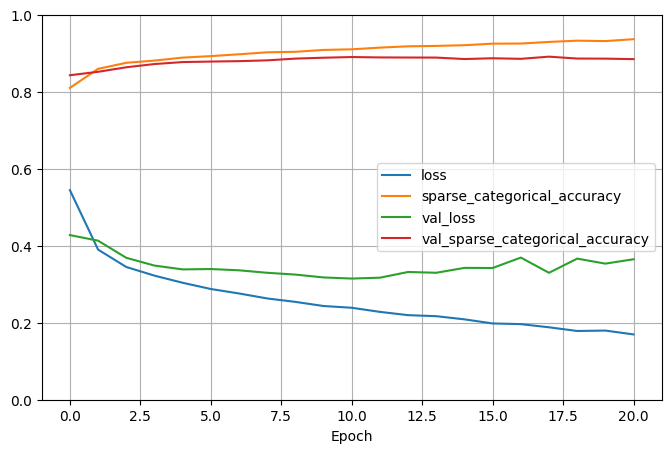

In [31]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=128, activation='relu', name='hidden_1')(flatten_layer)
hidden_2 = keras.layers.Dense(units=64, activation='relu', name='hidden_2')(hidden_1)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_2)
model_reduc = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_reduc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                    loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_reduc = model_reduc.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_reduc.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Recojo cable! Esta estrategia ha empeorado bastante. Igual podría reducir el número de capas internas y usar tan solo `1 capa oculta`.

Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6892 - sparse_categorical_accuracy: 0.7616 - val_loss: 0.4754 - val_sparse_categorical_accuracy: 0.8324
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.8555 - val_loss: 0.3721 - val_sparse_categorical_accuracy: 0.8680
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3594 - sparse_categorical_accuracy: 0.8717 - val_loss: 0.3653 - val_sparse_categorical_accuracy: 0.8742
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3266 - sparse_categorical_accuracy: 0.8825 - val_loss: 0.3567 - val_sparse_categorical_accuracy: 0.8721
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.8856 - val_loss: 0.3288 - val_sparse_categorical_accuracy: 0.8809
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2845 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.3478 - val_sparse_categorical_accuracy: 0.8723
Epoch 7/10

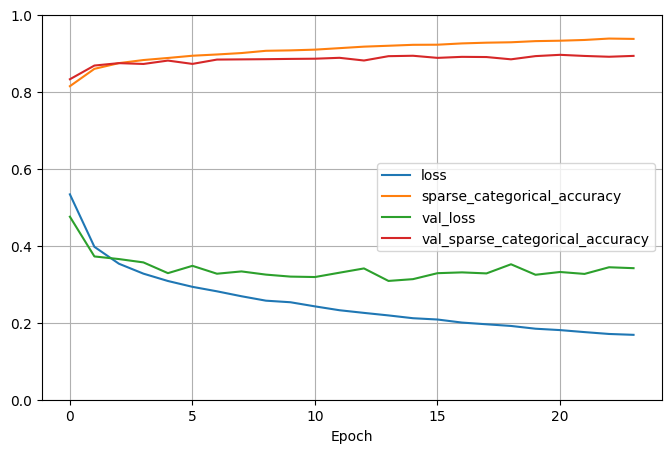

In [34]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=128, activation='relu', name='hidden_1')(flatten_layer)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_1)
model_1layer = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_1layer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_1layer = model_1layer.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_1layer.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Tampoco ha mejorado demasiado.

### Estrategia de mejora 4: Ajustar el Learning Rate (en el compile)

El learning rate puede tener un gran impacto en cómo el modelo se ajusta a los datos. A veces un learning_rate más pequeño puede mejorar el rendimiento general.

Epoch 1/100


c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0086 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.4804 - val_sparse_categorical_accuracy: 0.8375
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4616 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.4325 - val_sparse_categorical_accuracy: 0.8505
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4092 - sparse_categorical_accuracy: 0.8565 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8594
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3668 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.3848 - val_sparse_categorical_accuracy: 0.8622
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.3689 - val_sparse_categorical_accuracy: 0.8733
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8806 - val_loss: 0.3591 - val_sparse_categorical_accuracy: 0.8742
Epoch 7/10

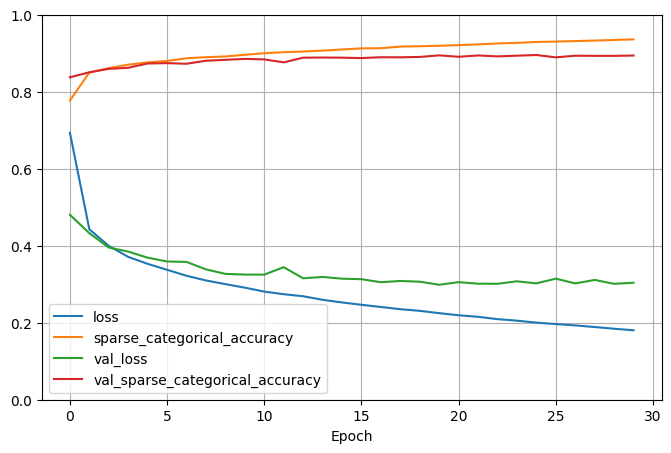

In [32]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=300, activation='relu', name='hidden_1')(flatten_layer)
hidden_2 = keras.layers.Dense(units=150, activation='relu', name='hidden_2')(hidden_1)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_2)
model_learning_rate = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_learning_rate.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                            loss=keras.losses.SparseCategoricalCrossentropy(),
                            metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_learning_rate = model_learning_rate.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_learning_rate.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Nada... sigo sin mejorar los resultados. Todos son parecidos.


### Estrategia de mejora 5: GridSearch

Probablemente la mejor convinación sea un a combinación de todas estas anteriores, por eso, voy a buscar los mejores hiperparámetros con algo similar a GridSearchCV de sklearn (me he apoyado de ChatGPT y la web de Keras para descubrir esta parte, porque no hemos visto nada en el bootcamp sobre ello).

In [35]:
!pip install keras-tuner

In [38]:
from keras_tuner import RandomSearch, GridSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Hyperparam: número de unidades en la capa 1
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=32),
                                 activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(0.001)))
    
    # Hyperparam: número de unidades en la capa 2
    model.add(keras.layers.Dense(units=hp.Int('units_2', min_value=64, max_value=512, step=32),
                                 activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(0.001)))
    
    # Salida
    model.add(keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax'))
    
    # Compilación del modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0001])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    return model

# Busqueda Random
# Cada configuración de hiperparámetros se ejecuta 3 veces para reducir el impacto del azar.
# Especifica el lugar donde se almacenarán los resultados del ajuste y el nombre del proyecto.
# Especifica el nombre del proyecto donde se almacenarán los resultados del ajuste.
tuner = RandomSearch(hypermodel=build_model,
                     objective='val_sparse_categorical_accuracy',
                     max_trials=5,
                     executions_per_trial=3, 
                     directory='keras_rand_search', 
                     project_name='image_classification') 

# Durante la búsqueda, el optimizador probará diferentes configuraciones de hiperparámetros 
# (número de unidades en las capas y tasa de aprendizaje) y entrenará el modelo con las configuraciones seleccionadas.
# epochs=10: Cada configuración se entrena durante 10 épocas.
# validation_split=0.2: Se utiliza el 20% de los datos de entrenamiento como datos de validación durante la búsqueda.
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)


Trial 5 Complete [00h 02m 51s]
val_sparse_categorical_accuracy: 0.8814444343249003

Best val_sparse_categorical_accuracy So Far: 0.8830833435058594
Total elapsed time: 00h 14m 05s


In [49]:
# Obtener el mejor modelo
# num_models=1 indica que solo quiero el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model

<Sequential name=sequential, built=True>

In [50]:
# Obtener los mejores hiperparámetros
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters

In [51]:
# Resumen del mejor modelo
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 448)            │       351,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 448)            │       201,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         4,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,322 (2.13 MB)

 Trainable params: 557,322 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

*Ahora que he obtenido el "mejor modelo" con el Random Search, voy hacer otro entrenamiento (porque no es nuevo, si no que se suma al ya hecho), para ver como ha evoluciado su función de perdida y la métrica. Esto tal vez lo podría haber hecho antes pero no lo he almacenado en ninguna variable.*

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5036 - sparse_categorical_accuracy: 0.8933 - val_loss: 0.5252 - val_sparse_categorical_accuracy: 0.8821
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4738 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.5015 - val_sparse_categorical_accuracy: 0.8836
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4604 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.4895 - val_sparse_categorical_accuracy: 0.8847
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4399 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.4838 - val_sparse_categorical_accuracy: 0.8826
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4286 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4710 - val_sparse_categorical_accuracy: 0.8802
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4154 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.4537 - val_sparse_categorical_accuracy: 0.886

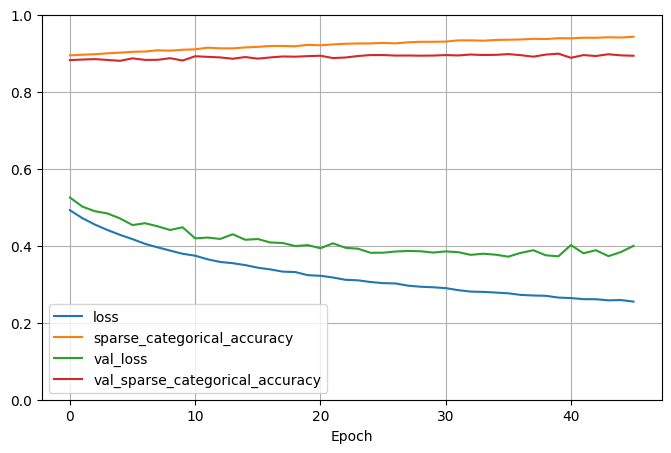

In [53]:
# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_best_model = best_model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose='auto',
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_best_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

Después de toda esta busqueda no considero que los resultados hayan mejorado respecto a antes.

### Elección de modelo

De todas las estrategias que he empleado considero que el mejor resultado lo he obtenido con la `Regularización L2` (es una elección un poco a ojo), así que ese va a ser el modelo que voy a evaluar contra test.

Como el entrenamiento no es demasiado largo, y para tenerlo aquí más claro, voy a volver a crear y entrenar el modelo. Esta vez sin mostrar información (verbose).

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


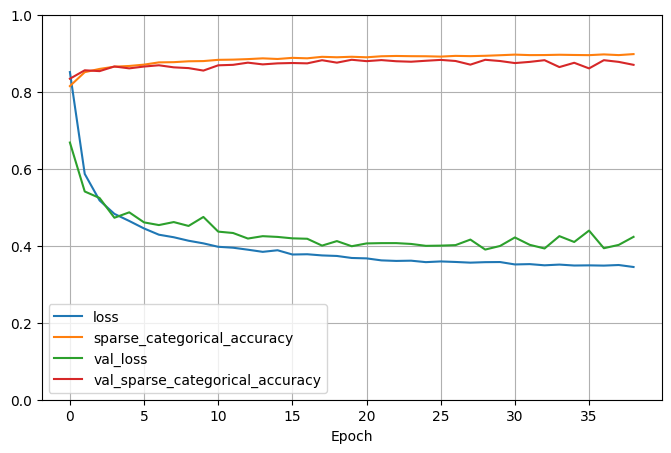

In [54]:
# Encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]), name='input_layer')
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hidden_1 = keras.layers.Dense(units=300, 
                              activation='relu', 
                              kernel_regularizer=keras.regularizers.l2(0.001), 
                              name='hidden_1')(flatten_layer)
hidden_2 = keras.layers.Dense(units=150, 
                              activation='relu', 
                              kernel_regularizer=keras.regularizers.l2(0.001), 
                              name='hidden_2')(hidden_1)
output = keras.layers.Dense(pd.DataFrame(y_train).nunique()[0], activation='softmax', name='output')(hidden_2)
model_L2 = keras.Model(inputs=[input_layer], outputs=[output])

# Congiguración de ejecución
model_L2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss=keras.losses.SparseCategoricalCrossentropy(),
                 metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Callback: EarlyStopping
cb_earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
    )

# Entrenamiento
history_L2 = model_L2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    verbose=0,
    callbacks=[cb_earlystopping],
    validation_split=0.2
)

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
pd.DataFrame(history_L2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epoch')
plt.show()

### Evaluar contra test

Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde. 


In [55]:
# Obtenemos el "score" a partir del conjunto de test
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model_L2.evaluate(X_test, y_test)
print("(Test loss, Test acc) =", results)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4090 - sparse_categorical_accuracy: 0.8771
(Test loss, Test acc) = [0.41186708211898804, 0.8763999938964844]


Tenemos un Accuracy = 87.6% sobre el set de test, lo cual es bastante bueno.

In [59]:
# Realizar predicciones sobre el conjunto de test
y_pred_prob = model_L2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.77      0.78      1000
           3       0.88      0.89      0.89      1000
           4       0.76      0.82      0.79      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.70      0.70      1000
           7       0.94      0.93      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [67]:
# Mostrar algunas predicciones, nivel de confianza y si eran acertadas
num_samples = 10 

# Seleccionar muestras aleatorias
indices = np.random.choice(len(y_test), num_samples, replace=False)  

print("Muestras de Predicciones:")
for i in indices:
    print(f"Predicción: {y_pred[i]}, Confianza: {np.max(y_pred_prob[i]):.2f}, Correcta: {y_test[i] == y_pred[i]}")


Muestras de Predicciones:
Predicción: 2, Confianza: 0.44, Correcta: False
Predicción: 7, Confianza: 1.00, Correcta: True
Predicción: 0, Confianza: 0.97, Correcta: True
Predicción: 8, Confianza: 0.99, Correcta: True
Predicción: 4, Confianza: 0.96, Correcta: True
Predicción: 6, Confianza: 0.91, Correcta: True
Predicción: 3, Confianza: 0.93, Correcta: True
Predicción: 2, Confianza: 0.85, Correcta: False
Predicción: 7, Confianza: 0.80, Correcta: True
Predicción: 4, Confianza: 0.47, Correcta: True


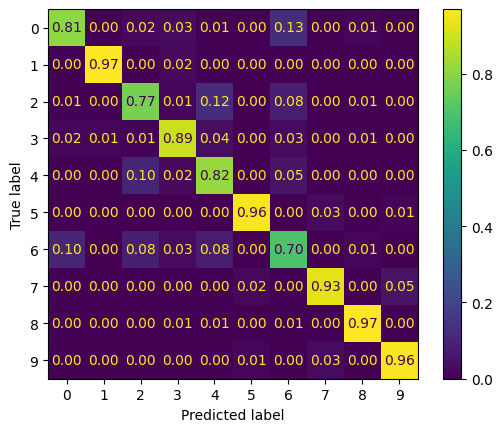

In [64]:
# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.2f')

Del análisis de la matriz de confusión se puede inferir que los resultados son buenos, pero:
- Cuando realmente es un 0, el modelo lo confunde un 13% de las veces con un 6
- Cuando realmente es un 2, el modelo lo confunde un 12% de las veces con un 4
- Cuando realmente es un 4, el modelo lo confunde un 10% de las veces con un 2
- Cuando realmente es un 6, el modelo lo confunde un 10% de las veces con un 0

Estas son las clases en las que se debería hacer una evaluación de errores.